In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

data = pd.read_csv('train_wn75k28.csv')
print(data.shape)
data.head()

(39161, 19)


id  created_at  campaign_var_1  campaign_var_2  products_purchased  \
0   1  2021-01-01               1               2                 2.0   
1   2  2021-01-01               2               1                 2.0   
2   3  2021-01-01               9               3                 3.0   
3   4  2021-01-01               6               7                 2.0   
4   5  2021-01-01               4               6                 NaN   

  signup_date  user_activity_var_1  user_activity_var_2  user_activity_var_3  \
0  2020-09-24                    0                    0                    0   
1  2020-09-19                    1                    0                    1   
2  2021-08-11                    1                    0                    0   
3  2017-10-04                    0                    0                    0   
4  2020-06-08                    0                    0                    0   

   user_activity_var_4  user_activity_var_5  user_activity_var_6  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   user_activity_var_7  user_activity_var_8  user_activity_var_9  \
0                    1                    1                    0   
1                    1                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    1                    0                    0   

   user_activity_var_10  user_activity_var_11  user_activity_var_12  buy  
0                     0                     0                     0    0  
1                     0                     0                     0    0  
2                     0                     0                     0    0  
3                     0                     0                     0    0  
4                     0                     1                     0    0

In [2]:
data.describe()

id  campaign_var_1  campaign_var_2  products_purchased  \
count  39161.000000    39161.000000    39161.000000        18250.000000   
mean   19581.000000        6.523812        6.452746            2.154137   
std    11304.951283        3.472944        2.614296            0.779815   
min        1.000000        1.000000        1.000000            1.000000   
25%     9791.000000        4.000000        5.000000            2.000000   
50%    19581.000000        6.000000        6.000000            2.000000   
75%    29371.000000        9.000000        8.000000            3.000000   
max    39161.000000       16.000000       15.000000            4.000000   

       user_activity_var_1  user_activity_var_2  user_activity_var_3  \
count         39161.000000         39161.000000         39161.000000   
mean              0.400092             0.006716             0.102832   
std               0.509194             0.081676             0.303743   
min               0.000000             0.000000             0.000000   
25%               0.000000             0.000000             0.000000   
50%               0.000000             0.000000             0.000000   
75%               1.000000             0.000000             0.000000   
max               3.000000             1.000000             1.000000   

       user_activity_var_4  user_activity_var_5  user_activity_var_6  \
count         39161.000000         39161.000000         39161.000000   
mean              0.011465             0.151503             0.499834   
std               0.106463             0.359681             0.558166   
min               0.000000             0.000000             0.000000   
25%               0.000000             0.000000             0.000000   
50%               0.000000             0.000000             0.000000   
75%               0.000000             0.000000             1.000000   
max               1.000000             2.000000             3.000000   

       user_activity_var_7  user_activity_var_8  user_activity_var_9  \
count         39161.000000         39161.000000         39161.000000   
mean              0.286612             0.174434             0.011440   
std               0.455784             0.379689             0.106346   
min               0.000000             0.000000             0.000000   
25%               0.000000             0.000000             0.000000   
50%               0.000000             0.000000             0.000000   
75%               1.000000             0.000000             0.000000   
max               2.000000             2.000000             1.000000   

       user_activity_var_10  user_activity_var_11  user_activity_var_12  \
count          39161.000000          39161.000000          39161.000000   
mean               0.000383              0.218942              0.000562   
std                0.019568              0.431544              0.023696   
min                0.000000              0.000000              0.000000   
25%                0.000000              0.000000              0.000000   
50%                0.000000              0.000000              0.000000   
75%                0.000000              0.000000              0.000000   
max                1.000000              4.000000              1.000000   

                buy  
count  39161.000000  
mean       0.051020  
std        0.220042  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [3]:
data.isna().sum()  / data.shape[0]

id                      0.000000
created_at              0.000000
campaign_var_1          0.000000
campaign_var_2          0.000000
products_purchased      0.533975
signup_date             0.385920
user_activity_var_1     0.000000
user_activity_var_2     0.000000
user_activity_var_3     0.000000
user_activity_var_4     0.000000
user_activity_var_5     0.000000
user_activity_var_6     0.000000
user_activity_var_7     0.000000
user_activity_var_8     0.000000
user_activity_var_9     0.000000
user_activity_var_10    0.000000
user_activity_var_11    0.000000
user_activity_var_12    0.000000
buy                     0.000000
dtype: float64

In [4]:
data.dtypes

id                        int64
created_at               object
campaign_var_1            int64
campaign_var_2            int64
products_purchased      float64
signup_date              object
user_activity_var_1       int64
user_activity_var_2       int64
user_activity_var_3       int64
user_activity_var_4       int64
user_activity_var_5       int64
user_activity_var_6       int64
user_activity_var_7       int64
user_activity_var_8       int64
user_activity_var_9       int64
user_activity_var_10      int64
user_activity_var_11      int64
user_activity_var_12      int64
buy                       int64
dtype: object

In [5]:
data.created_at = pd.to_datetime(data.created_at)

## Derived Variables - Feature Engineering

In [6]:
data['creation_day'] = data.created_at.dt.day
data['creation_month'] = data.created_at.dt.month_name()
data['creation_weekday'] = data.created_at.dt.day_name()

In [7]:
import numpy as np

dist = data.products_purchased.value_counts(normalize=True)
nan_index = data.products_purchased.isna()
data.loc[nan_index, 'products_purchased'] = np.random.choice(dist.index, size=len(data[nan_index]), p=dist.values)

In [8]:
# remove columns signup_date and products purchased since they have a lot of nulls.
data.drop(columns=['id','signup_date', 'created_at'], inplace=True)

In [9]:
data.head()

campaign_var_1  campaign_var_2  products_purchased  user_activity_var_1  \
0               1               2                 2.0                    0   
1               2               1                 2.0                    1   
2               9               3                 3.0                    1   
3               6               7                 2.0                    0   
4               4               6                 3.0                    0   

   user_activity_var_2  user_activity_var_3  user_activity_var_4  \
0                    0                    0                    0   
1                    0                    1                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   user_activity_var_5  user_activity_var_6  user_activity_var_7  \
0                    0                    0                    1   
1                    0                    0                    1   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    1   

   user_activity_var_8  user_activity_var_9  user_activity_var_10  \
0                    1                    0                     0   
1                    0                    0                     0   
2                    0                    0                     0   
3                    0                    0                     0   
4                    0                    0                     0   

   user_activity_var_11  user_activity_var_12  buy  creation_day  \
0                     0                     0    0             1   
1                     0                     0    0             1   
2                     0                     0    0             1   
3                     0                     0    0             1   
4                     1                     0    0             1   

  creation_month creation_weekday  
0        January           Friday  
1        January           Friday  
2        January           Friday  
3        January           Friday  
4        January           Friday

### Data type fix

In [10]:
data[['creation_weekday', 'creation_month']] = data[['creation_weekday', 'creation_month']].astype('category')
data.dtypes

campaign_var_1             int64
campaign_var_2             int64
products_purchased       float64
user_activity_var_1        int64
user_activity_var_2        int64
user_activity_var_3        int64
user_activity_var_4        int64
user_activity_var_5        int64
user_activity_var_6        int64
user_activity_var_7        int64
user_activity_var_8        int64
user_activity_var_9        int64
user_activity_var_10       int64
user_activity_var_11       int64
user_activity_var_12       int64
buy                        int64
creation_day               int64
creation_month          category
creation_weekday        category
dtype: object

In [11]:
###

## Univariate Analysis

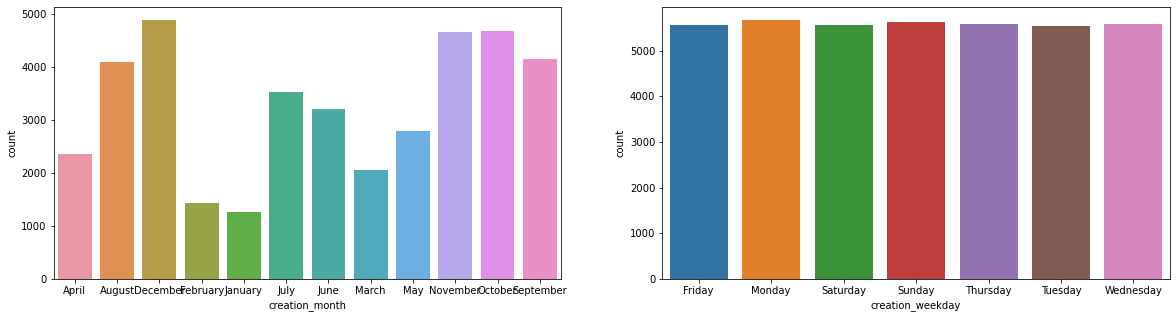

In [12]:
cat_cols = data.select_dtypes(include=['category']).columns
plt.figure(figsize=(20, 5))
for idx, col in enumerate(cat_cols):
    plt.subplot(1, 2, idx+1)
    sns.countplot(data=data, x=col);

In [13]:
numeric_cols = set(data.columns) - set(cat_cols) - set(['buy'])
for col in numeric_cols:
    print(f'{col} has {data[col].nunique()} unique values')

user_activity_var_5 has 3 unique values
products_purchased has 4 unique values
user_activity_var_8 has 3 unique values
user_activity_var_9 has 2 unique values
user_activity_var_10 has 2 unique values
user_activity_var_1 has 4 unique values
campaign_var_2 has 15 unique values
user_activity_var_3 has 2 unique values
user_activity_var_4 has 2 unique values
campaign_var_1 has 16 unique values
user_activity_var_2 has 2 unique values
user_activity_var_7 has 3 unique values
creation_day has 31 unique values
user_activity_var_6 has 4 unique values
user_activity_var_12 has 2 unique values
user_activity_var_11 has 5 unique values


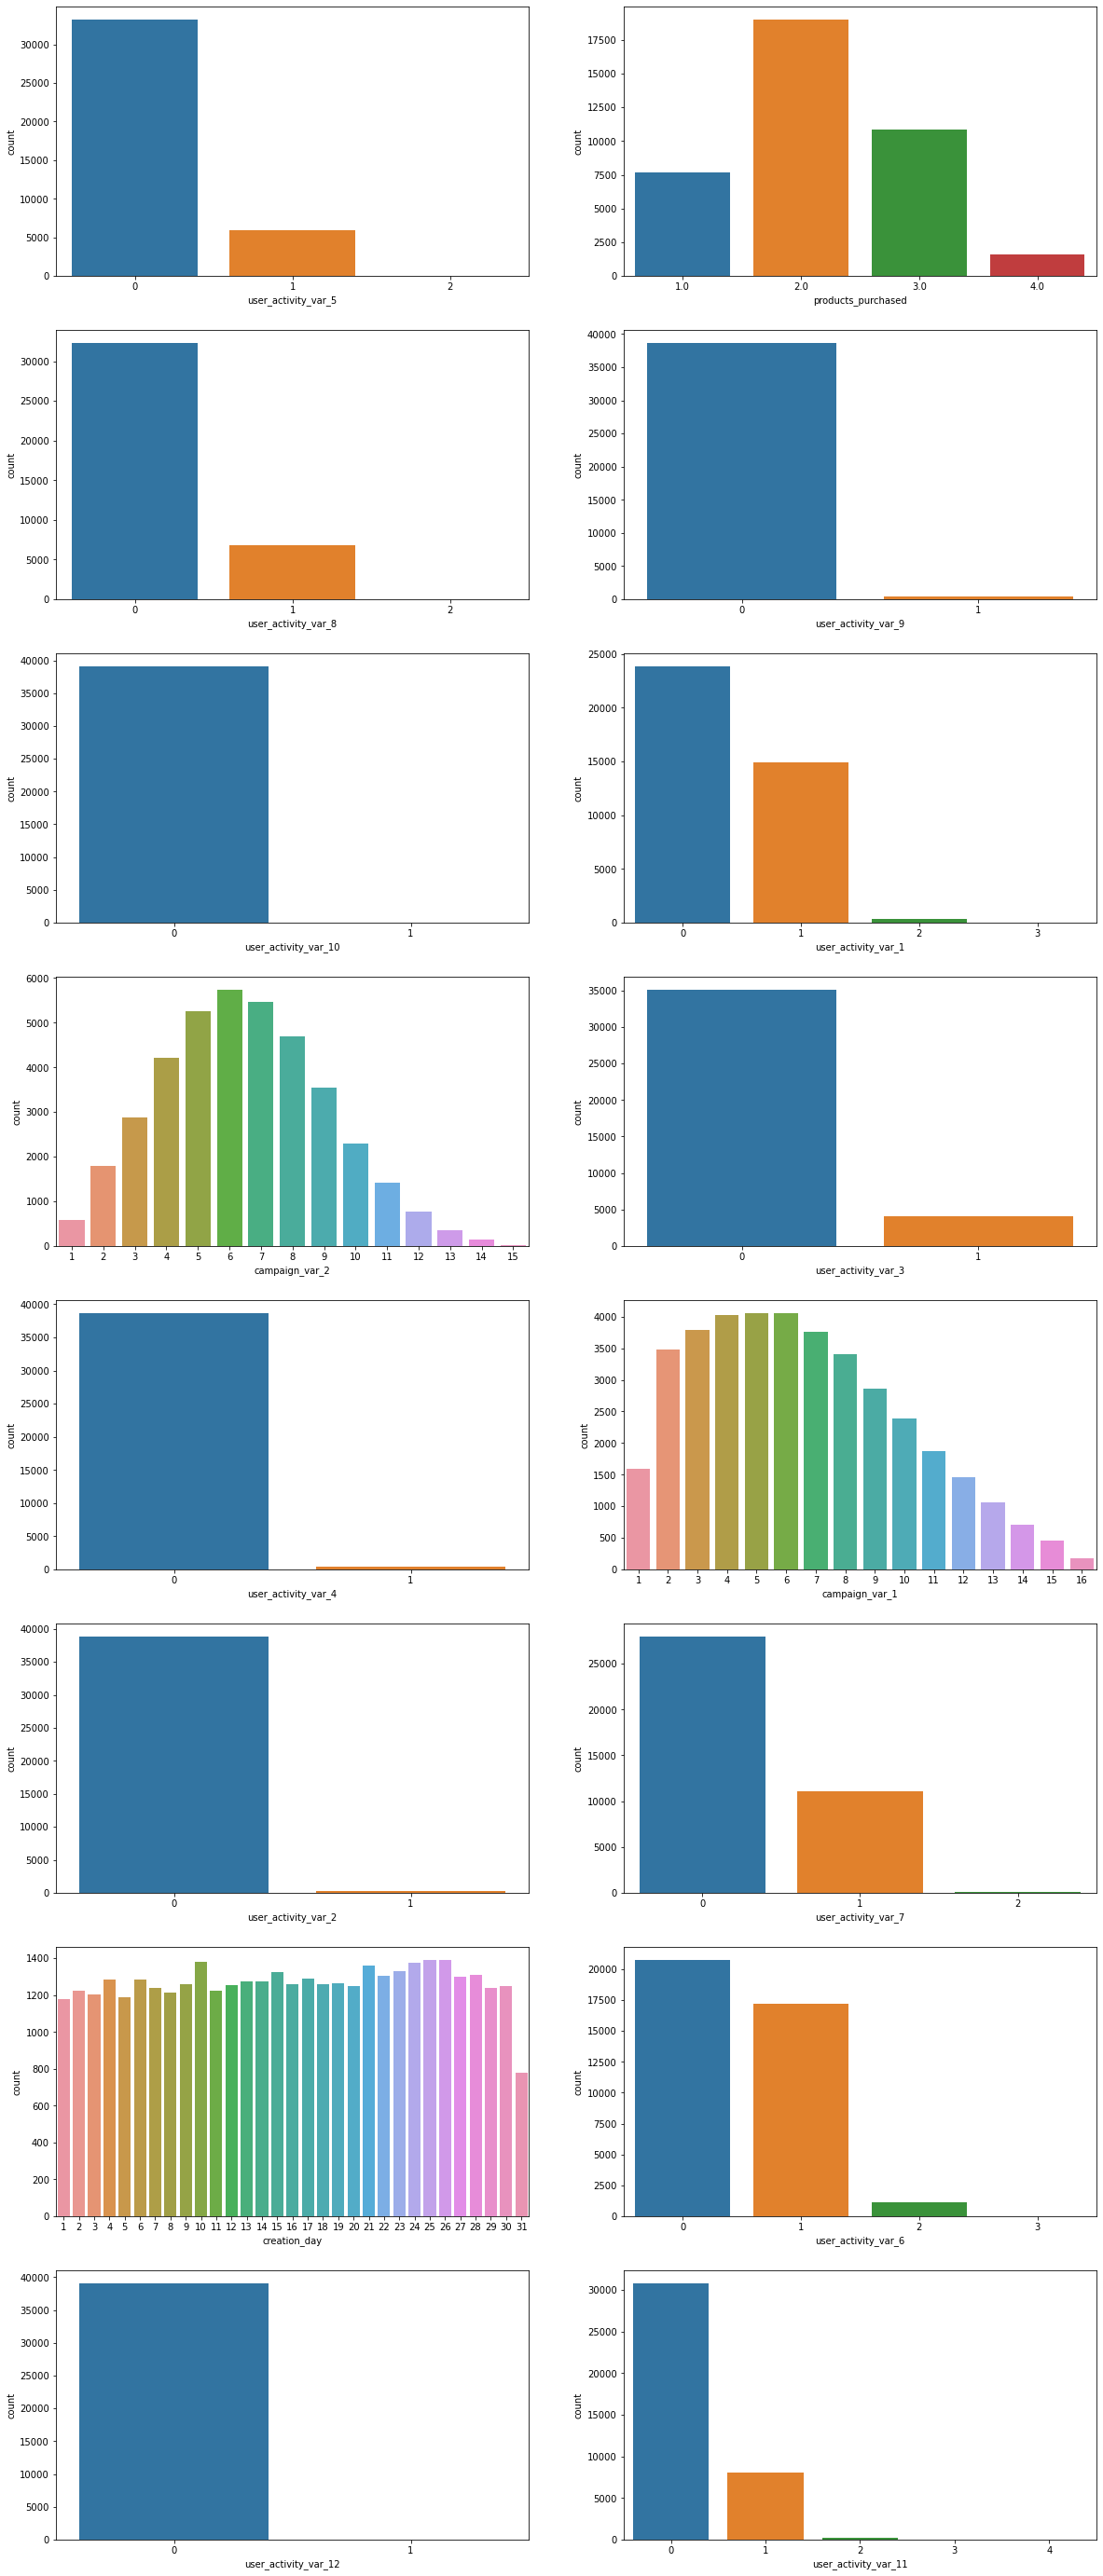

In [14]:

plt.figure(figsize=(20, 50))
for idx, col in enumerate(numeric_cols):
    plt.subplot(8, 2, idx+1)
    sns.countplot(data=data, x=col);

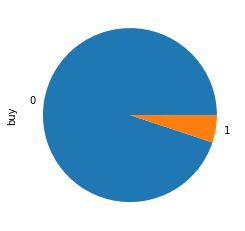

In [15]:
# target variable analysis
dist =data.buy.value_counts()
dist.plot.pie();

## Bivariate Analysis with target variable

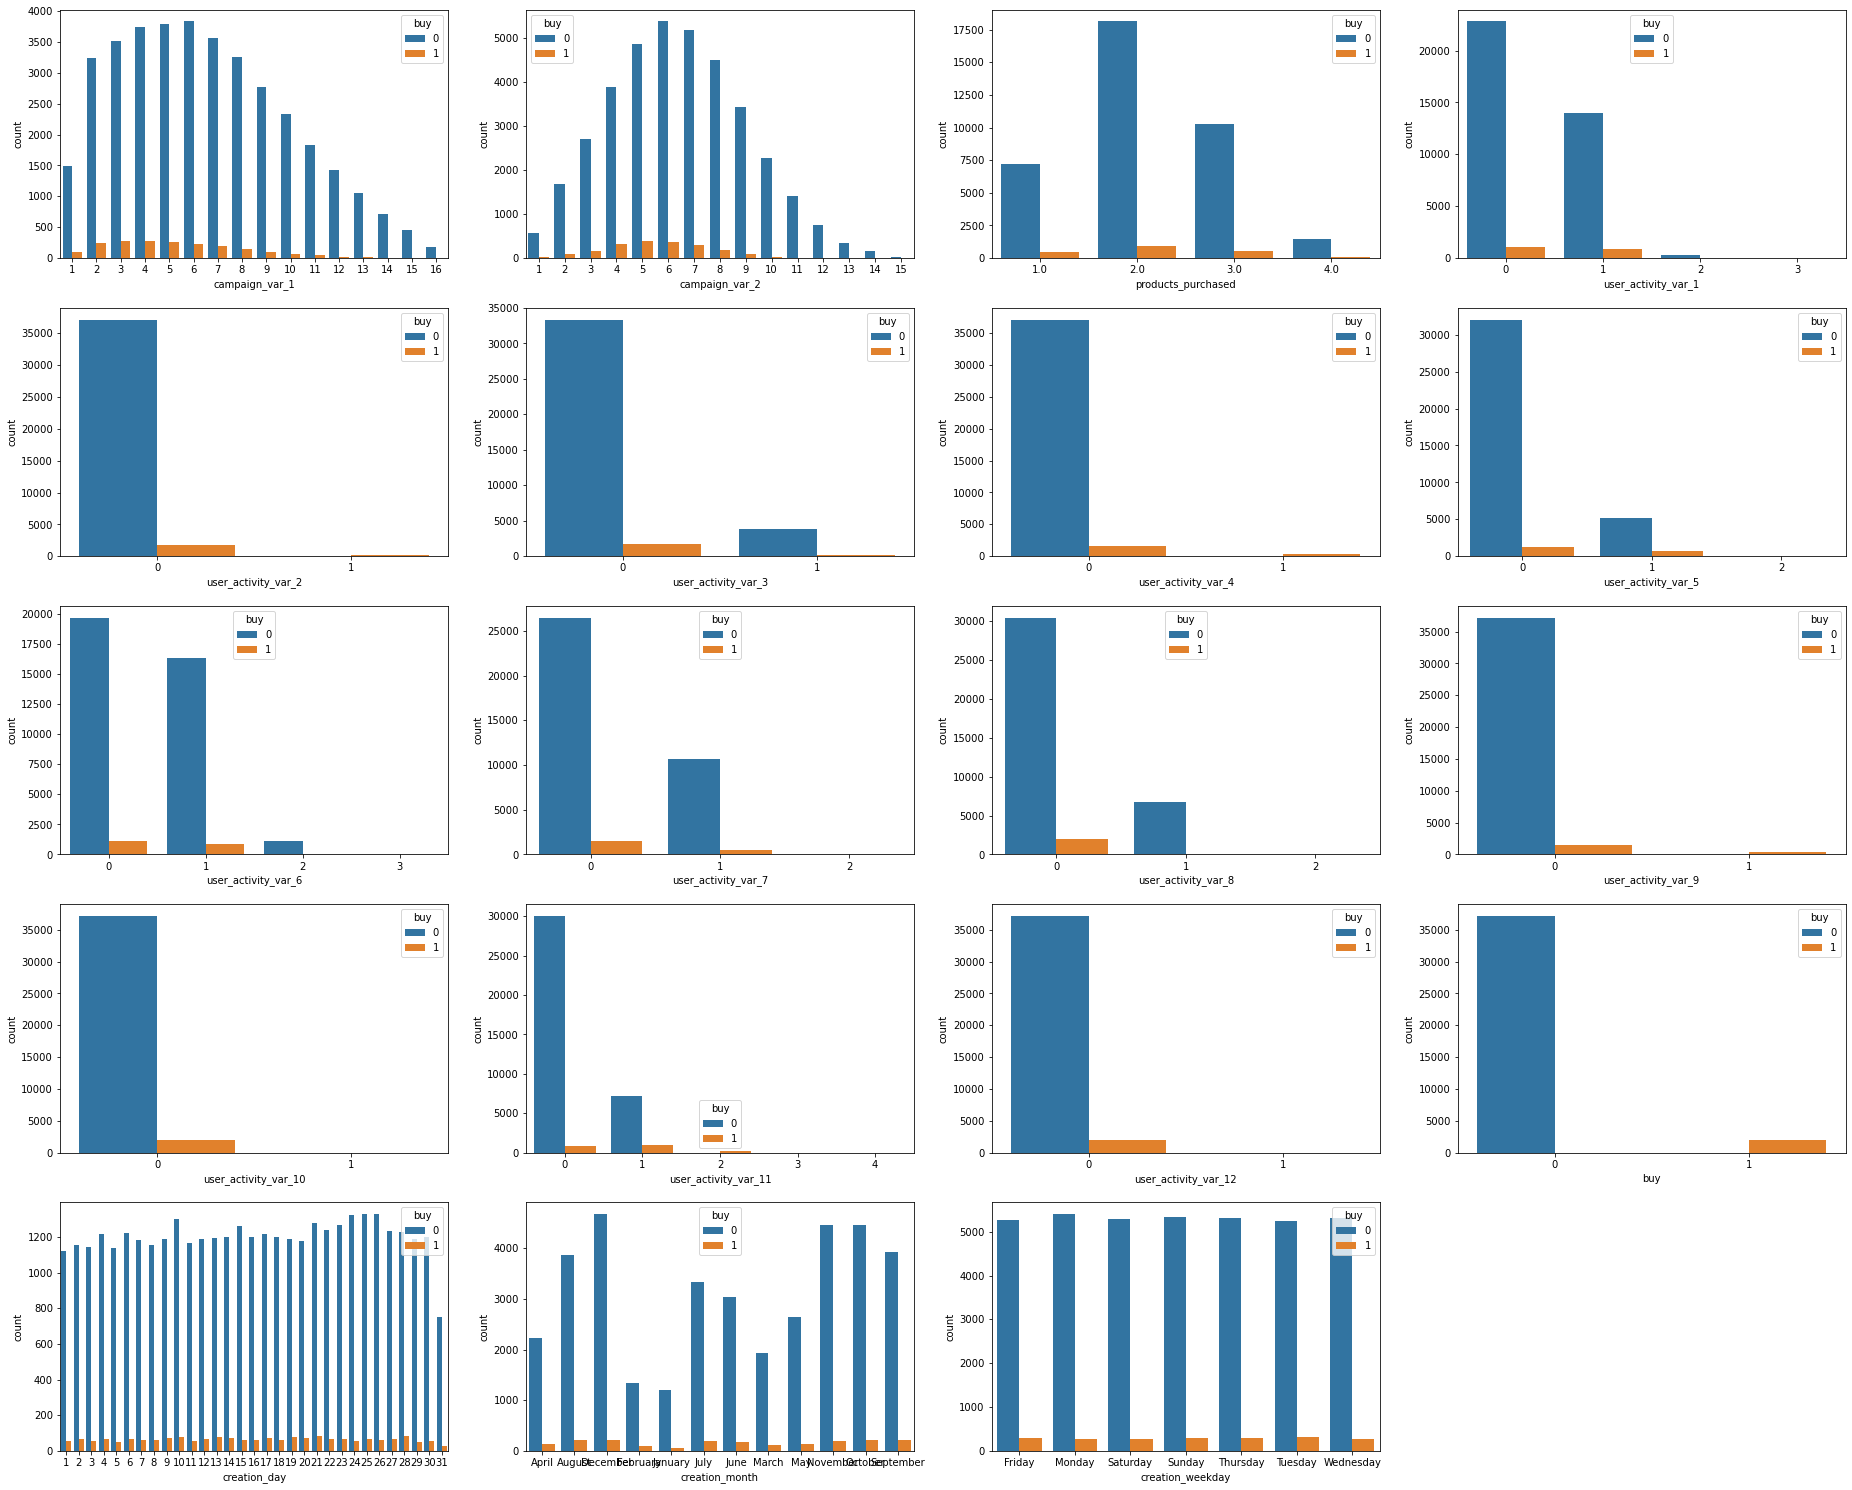

In [16]:
plt.figure(figsize=(32, 32))
for i, col in enumerate(data.columns):
    plt.subplot(6, 4, i+1)
    sns.countplot(data=data, hue='buy',x=col)

### Feature Preparation for Modelling

In [17]:
# convert categorical variables to One Hot Encoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first')
encoding = encoder.fit_transform(data[['creation_weekday', 'creation_month']])
encoded_data = pd.DataFrame(columns=encoder.get_feature_names(), data=encoding.toarray()).applymap(int)
data = pd.concat([data, encoded_data], axis=1)
data.drop(columns=['creation_weekday', 'creation_month'], inplace=True)
data.head()

campaign_var_1  campaign_var_2  products_purchased  user_activity_var_1  \
0               1               2                 2.0                    0   
1               2               1                 2.0                    1   
2               9               3                 3.0                    1   
3               6               7                 2.0                    0   
4               4               6                 3.0                    0   

   user_activity_var_2  user_activity_var_3  user_activity_var_4  \
0                    0                    0                    0   
1                    0                    1                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   user_activity_var_5  user_activity_var_6  user_activity_var_7  ...  \
0                    0                    0                    1  ...   
1                    0                    0                    1  ...   
2                    0                    0                    0  ...   
3                    0                    0                    0  ...   
4                    0                    0                    1  ...   

   x1_December  x1_February  x1_January  x1_July  x1_June  x1_March  x1_May  \
0            0            0           1        0        0         0       0   
1            0            0           1        0        0         0       0   
2            0            0           1        0        0         0       0   
3            0            0           1        0        0         0       0   
4            0            0           1        0        0         0       0   

   x1_November  x1_October  x1_September  
0            0           0             0  
1            0           0             0  
2            0           0             0  
3            0           0             0  
4            0           0             0  

[5 rows x 34 columns]

## Model Building

We build a base model for getting intuition of the possible modelling metrics. For base model, we will build a Logistic Regression Classifier

In [18]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

y = data.pop('buy')
X = data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(27412, 33) (27412,) (11749, 33) (11749,)


In [19]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=700)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=700)

In [20]:
y_pred = lr.predict(X_test)
y_pred_prob = lr.predict_proba(X_test)

from sklearn.metrics import roc_auc_score, roc_curve, f1_score
print('roc score', roc_auc_score(y_true=y_test, y_score=y_pred_prob[:, 1]))
print('f1-score', f1_score(y_true=y_test, y_pred=y_pred))

roc score 0.9193892982585523
f1-score 0.6702355460385439


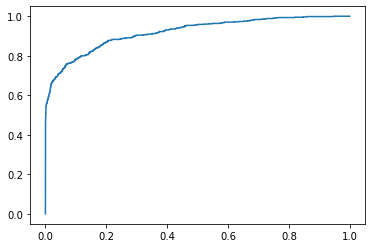

In [21]:
fpr, tpr, theshold = roc_curve(y_true=y_test, y_score=y_pred_prob[:, 1])
plt.plot(fpr, tpr)

**Since the data is imbalanced, we will use SMOTE to oversample the minority class**


### Oversampling using SMOTE

In [22]:
smote = SMOTE()
resampled_X, resampled_y = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(resampled_X, resampled_y, random_state=42, test_size=0.2)

F1-score 0.886556927297668


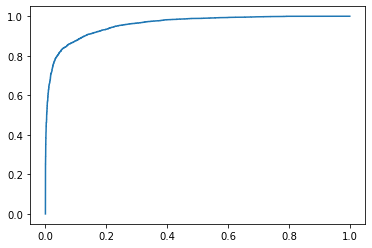

In [23]:
lr = LogisticRegression(max_iter=700)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred_prob = lr.predict_proba(X_test)

print('F1-score', f1_score(y_true=y_test, y_pred=y_pred))
fpr, tpr, threshold = roc_curve(y_true=y_test, y_score=y_pred_prob[:, 1])

plt.plot(fpr, tpr);

<hr/>

In [24]:
grid = GridSearchCV(estimator=LogisticRegression(), param_grid={
   'penalty': ['l1', 'none'],
   'max_iter': range(200, 801, 200)
}, cv=5, n_jobs=-1, verbose=True, scoring='f1')

grid.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


c:\Users\textilist\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.88790039        nan 0.88796564        nan 0.88806124
        nan 0.88794717]
  warnings.warn(
c:\Users\textilist\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': range(200, 801, 200),
                         'penalty': ['l1', 'none']},
             scoring='f1', verbose=True)

Logistic Regression is failing to converge due to certain params. Hence we will assert the best fitted LR model as the one with default args

### Creating Random Forest Classifier

We shall experiment with RF classifier with default params first to gauge its performance on this data

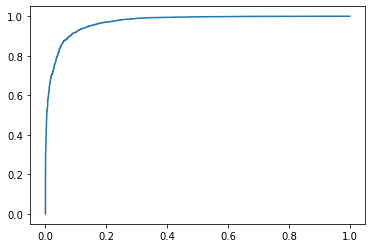

In [25]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, max_depth=15, min_samples_leaf=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_true=y_test, y_score=y_pred_prob[:, 1])
plt.plot(fpr, tpr);

In [26]:
print('roc score', roc_auc_score(y_true=y_test, y_score=y_pred_prob[:, 1]))
print('f1-score', f1_score(y_true=y_test, y_pred=y_pred))

roc score 0.9707297826097934
f1-score 0.9118110236220472


Now we will start hyperparam tuning for RF

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Params:  {'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 18}
Best Random Forest F1-score 0.9535820402773192


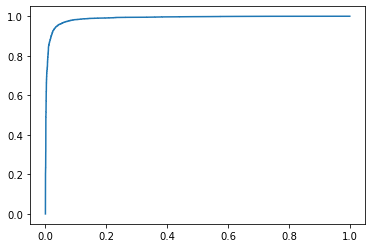

In [27]:
grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid={
   'n_estimators': range(10, 20, 2),
   'max_depth': range(4, 22, 4),
   'min_samples_leaf': range(1, 5)
}, cv=3, n_jobs=4, verbose=True, scoring='f1')

grid.fit(X_train, y_train)

rf =  grid.best_estimator_
print('Best Params: ', grid.best_params_)

y_pred = rf.predict(X_test)
y_pred_prob = rf.predict_proba(X_test)

print('Best Random Forest F1-score', f1_score(y_true=y_test, y_pred=y_pred))
fpr, tpr, threshold = roc_curve(y_true=y_test, y_score=y_pred_prob[:, 1])

plt.plot(fpr, tpr);

### Creating kNN Classifier
We will start with the default params of KNN Classifier

F1-score 0.8800333075596265


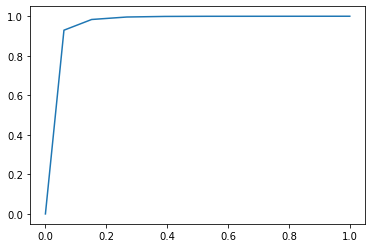

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred_prob = knn.predict_proba(X_test)

print('F1-score', f1_score(y_true=y_test, y_pred=y_pred))
fpr, tpr, threshold = roc_curve(y_true=y_test, y_score=y_pred_prob[:, 1])

plt.plot(fpr, tpr);

Now we will start hyperparam tuning with GridSearch

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Params:  {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Best KNN Classifier F1-score 0.9013089802130898


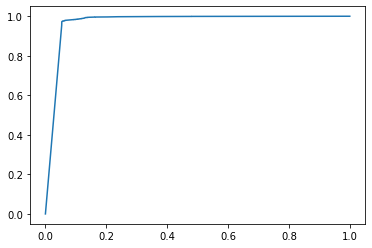

In [29]:
grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid={
    'weights': ['uniform','distance'],
    'n_neighbors': range(5, 20, 5),
    'p': [1, 2],
}, cv=3, n_jobs=4, verbose=True, scoring='f1')

grid.fit(X_train, y_train)

knn =  grid.best_estimator_
print('Best Params: ', grid.best_params_)

y_pred = knn.predict(X_test)
y_pred_prob = knn.predict_proba(X_test)

print('Best KNN Classifier F1-score', f1_score(y_true=y_test, y_pred=y_pred))
fpr, tpr, threshold = roc_curve(y_true=y_test, y_score=y_pred_prob[:, 1])

plt.plot(fpr, tpr);

### Creating an Ensemble of the methods

We have seen 3 algorithms. However, none of the algorithms is able to get us above 0.95 F1-Score on validation data. Lets check if they can be combined to give better results

In [30]:
from sklearn.ensemble import VotingClassifier

#create a dictionary of our models
estimators=[('knn', knn), ('rf', rf), ('log_reg', lr)]#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

ensemble.fit(X_train, y_train)

y_pred = ensemble.predict(X_test)

print('Emsemble F1-Score is ', f1_score(y_true=y_test, y_pred=y_pred))

Emsemble F1-Score is  0.950927078555985


**the ensemble is giving better F1-Score close to 0.95 than any other inidividual classifier.**

## Testing on the given test file

In [37]:
test_data = pd.read_csv('test_Wf7sxXF.csv')
test_data_ids = test_data.id

test_data.head()

id  created_at  campaign_var_1  campaign_var_2  products_purchased  \
0  39162  2022-01-01               2               2                 NaN   
1  39163  2022-01-01               4               7                 3.0   
2  39164  2022-01-01               8               7                 NaN   
3  39165  2022-01-01               9               8                 2.0   
4  39166  2022-01-01               4               5                 2.0   

  signup_date  user_activity_var_1  user_activity_var_2  user_activity_var_3  \
0  2021-08-17                    1                    1                    0   
1  2020-05-21                    1                    0                    0   
2         NaN                    0                    0                    0   
3  2020-06-22                    0                    0                    0   
4  2021-03-10                    1                    0                    0   

   user_activity_var_4  user_activity_var_5  user_activity_var_6  \
0                    0                    0                    1   
1                    0                    0                    0   
2                    0                    1                    1   
3                    0                    1                    1   
4                    0                    0                    0   

   user_activity_var_7  user_activity_var_8  user_activity_var_9  \
0                    0                    0                    0   
1                    0                    1                    0   
2                    0                    0                    0   
3                    1                    0                    0   
4                    0                    0                    0   

   user_activity_var_10  user_activity_var_11  user_activity_var_12  
0                     0                     1                     0  
1                     0                     0                     0  
2                     0                     0                     0  
3                     0                     2                     0  
4                     0                     0                     0

In [38]:
test_data.created_at = pd.to_datetime(test_data.created_at)

test_data['creation_day'] = test_data.created_at.dt.day
test_data['creation_month'] = test_data.created_at.dt.month_name()
test_data['creation_weekday'] = test_data.created_at.dt.day_name()

test_data.drop(columns=['id','signup_date', 'created_at'], inplace=True)
test_data[['creation_weekday', 'creation_month']] = test_data[['creation_weekday', 'creation_month']].astype('category')

dist = test_data.products_purchased.value_counts(normalize=True)
nan_index = test_data.products_purchased.isna()
test_data.loc[nan_index, 'products_purchased'] = np.random.choice(dist.index, size=len(test_data[nan_index]), p=dist.values)

# convert categorical variables to One Hot Encoding
test_encoding = encoder.transform(test_data[['creation_weekday', 'creation_month']])
test_encoded_data = pd.DataFrame(columns=encoder.get_feature_names(), data=test_encoding.toarray()).applymap(int)
test_data = pd.concat([test_data, test_encoded_data], axis=1)
test_data.drop(columns=['creation_weekday', 'creation_month'], inplace=True)
test_data.head()

campaign_var_1  campaign_var_2  products_purchased  user_activity_var_1  \
0               2               2                 2.0                    1   
1               4               7                 3.0                    1   
2               8               7                 1.0                    0   
3               9               8                 2.0                    0   
4               4               5                 2.0                    1   

   user_activity_var_2  user_activity_var_3  user_activity_var_4  \
0                    1                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   user_activity_var_5  user_activity_var_6  user_activity_var_7  ...  \
0                    0                    1                    0  ...   
1                    0                    0                    0  ...   
2                    1                    1                    0  ...   
3                    1                    1                    1  ...   
4                    0                    0                    0  ...   

   x1_December  x1_February  x1_January  x1_July  x1_June  x1_March  x1_May  \
0            0            0           1        0        0         0       0   
1            0            0           1        0        0         0       0   
2            0            0           1        0        0         0       0   
3            0            0           1        0        0         0       0   
4            0            0           1        0        0         0       0   

   x1_November  x1_October  x1_September  
0            0           0             0  
1            0           0             0  
2            0           0             0  
3            0           0             0  
4            0           0             0  

[5 rows x 33 columns]

In [45]:
# predictions = ensemble.predict(test_data)
predictions = rf.predict(test_data)

predictions_df = pd.DataFrame({'id': test_data_ids, 'buy': predictions})
predictions_df.to_csv('test_predictions.csv', index=False)

In [46]:
predictions_df.head()

id  buy
0  39162    0
1  39163    0
2  39164    0
3  39165    1
4  39166    0

In [47]:
predictions_df.buy.value_counts()/predictions_df.shape[0]

0    0.933328
1    0.066672
Name: buy, dtype: float64

In [ ]:
lr.